<a href="https://colab.research.google.com/github/alexa08c/maps_project/blob/main/putonweb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Mr. Vedar, thank you for lookin at my project. It is a simulation of the 1800 democratic minus the candidate James J.  Please scroll to the bottom without touching any code. If there is a bug, please tell me. I thought I caught all of them, but this is the most complex project I've done. If there is one I will try to fix at soon as possible. Start by going to the Runtime menu and sellecting "Run all". 

In [1]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!rm -f cb_2020*
!wget https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_20m.zip
!unzip cb_2020_us_state_20m.zip

--2023-05-09 03:20:53--  https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 23.205.6.52, 2600:1400:11:18b::208c, 2600:1400:11:199::208c
Connecting to www2.census.gov (www2.census.gov)|23.205.6.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2020_us_state_20m.zip’

cb_2020_us_state_20     [  <=>               ] 186.14K   723KB/s    in 0.3s    

2023-05-09 03:20:53 (723 KB/s) - ‘cb_2020_us_state_20m.zip’ saved [190606]

Archive:  cb_2020_us_state_20m.zip
  inflating: cb_2020_us_state_20m.shp.ea.iso.xml  
  inflating: cb_2020_us_state_20m.shp.iso.xml  
  inflating: cb_2020_us_state_20m.shp  
  inflating: cb_2020_us_state_20m.shx  
  inflating: cb_2020_us_state_20m.dbf  
  inflating: cb_2020_us_state_20m.prj  
 extracting: cb_2020_us_state_20m.cpg  


In [3]:
#@title

cost = 0
class canidate:
    def __init__(self,name,state):
        self.name=name
        self._info={}
        self._info["state"]=state
    def get_info(self,tellme):
        return self._info[tellme]
    def set_info(self,what,value):
        self._info[what]=value
player=canidate("Joe Schmoe","Virginia")
Jefferson=canidate("Thomas Jefferson","Virginia")
Burr = canidate("Aaron Burr", "New Jersey")
Adams = canidate("John Adams", "Massachusetts")
Pinckney = canidate("Charles Pinckney","South Carolina")
player.set_info("econ","Agrarian")
player.set_info("Government","State Power")
player.set_info("FrenchRevolution","Love")
player.set_info("Party","Democratic-Republican")
player.set_info("British","Hate")
player.set_info("Tariffs","Hate")
player.set_info("budget",5000)
player.set_info("cheater","No")
player.set_info("traitor","No")
player.set_info("moron","No")
player.set_info("greedy","No")
player.set_info("name","Joe Schmoe")
player.set_info("vote",0)
player.set_info("turns",10)
Jefferson.set_info("econ","Agrarian")
Jefferson.set_info("Government","State Power")
Jefferson.set_info("FrenchRevolution","love")
Jefferson.set_info("Party","Democratic-Republic")
Jefferson.set_info("British","Hate")
Jefferson.set_info("Tariffs","Hate")
Jefferson.set_info("budget",5500)
Jefferson.set_info("name","Thomas Jefferson")
Jefferson.set_info("cheater","No")
Jefferson.set_info("traitor","No")
Jefferson.set_info("moron","No")
Jefferson.set_info("greedy","No")
Jefferson.set_info("vote",0)
Burr.set_info("econ",player.get_info("econ"))
Burr.set_info("Government",player.get_info("Government"))
Burr.set_info("FrenchRevolution",player.get_info("FrenchRevolution"))
Burr.set_info("Party",player.get_info("Party"))
Burr.set_info("British",player.get_info("British"))
Burr.set_info("Tariffs",player.get_info("Tariffs"))
Burr.set_info("budget",5500)
Burr.set_info("cheater","No")
Burr.set_info("traitor","No")
Burr.set_info("moron","No")
Burr.set_info("greedy","No")
Burr.set_info("name","Aaron Burr")
Burr.set_info("vote",0)
Adams.set_info("econ","No comment")
Adams.set_info("Government","Central power")
Adams.set_info("FrenchRevolution","Hate")
Adams.set_info("Party","Federalist")
Adams.set_info("British","No comment")
Adams.set_info("Tariffs","Love")
Adams.set_info("budget",5000)
Adams.set_info("name","John Adams")
Adams.set_info("cheater","No")
Adams.set_info("traitor","No")
Adams.set_info("moron","No")
Adams.set_info("greedy","No")
Adams.set_info("vote",0)
Pinckney.set_info("econ","Industrial")
Pinckney.set_info("Government","Central power")
Pinckney.set_info("FrenchRevolution","Hate")
Pinckney.set_info("Party","Federalist")
Pinckney.set_info("British","Love")
Pinckney.set_info("Tariffs","Love")
Pinckney.set_info("budget",6000)
Pinckney.set_info("name","Charles Pinckney")
Pinckney.set_info("cheater","No")
Pinckney.set_info("traitor","No")
Pinckney.set_info("moron","No")
Pinckney.set_info("greedy","No")
Pinckney.set_info("vote",0)
class StateEval:
    def __init__(self, name,code):
        self._name = name
        self._factors = {}
        self._presidentalvote = {}
        self._code=code
    
    def vote_counting(self, presidential_candidate, popularity):
        self._presidentalvote[presidential_candidate] = popularity
    
    def set_factor(self, factor, values):
        self._factors[factor] = values
    
    def get_factor(self, tellme):
        return self._factors[tellme]
    
    def calc_popularity(self, player):
        score = 50
        for fact, ratings in self._factors.items():
            if fact in player._info:
                val = player.get_info(fact)
                if val in ratings:
                    scoref = score * ratings[val]
                    score = round(scoref)
        
        return score

Virginia=StateEval("Virginia","VA")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.9}
govresp={"State Power": 1.1, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.1, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.1, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

responses={}
responses["econ"]=list(econresp.keys())
responses["government"]=list(govresp.keys())
responses["french"]=list(govresp.keys())
responses["british"]=list(britresp.keys())
responses["tariff"]=list(tariffresp.keys())


Virginia.set_factor("cheater",cheatingresp)
Virginia.set_factor("econ",econresp)
Virginia.set_factor("Government",govresp)
Virginia.set_factor("FrenchRevolution",frenchresp)
Virginia.set_factor("Party",partyresp)
Virginia.set_factor("British",britresp)
Virginia.set_factor("Tarrifs",tariffresp)
Virginia.set_factor("state",{"Virginia":1.2})
Virginia.set_factor("votes", 21)
Kentucky=StateEval("Kentucky","KY")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.8}
govresp={"State Power": 1.2, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.2, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.2, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

Kentucky.set_factor("cheater",cheatingresp)
Kentucky.set_factor("econ",econresp)
Kentucky.set_factor("Government",govresp)
Kentucky.set_factor("FrenchRevolution",frenchresp)
Kentucky.set_factor("Party",partyresp)
Kentucky.set_factor("British",britresp)
Kentucky.set_factor("Tariffs",tariffresp)
Kentucky.set_factor("state",{"Kentucky":1.2})
Kentucky.set_factor("votes", 4)
NorthCarolina=StateEval("NorthCarolina","NC")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.8}
govresp={"State Power": 1.2, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.2, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.2, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

NorthCarolina.set_factor("cheater",cheatingresp)
NorthCarolina.set_factor("econ",econresp)
NorthCarolina.set_factor("Government",govresp)
NorthCarolina.set_factor("FrenchRevolution",frenchresp)
NorthCarolina.set_factor("Party",partyresp)
NorthCarolina.set_factor("British",britresp)
NorthCarolina.set_factor("Tariffs",tariffresp)
NorthCarolina.set_factor("state",{"NorthCarolina":1.2})
NorthCarolina.set_factor("votes", 12)
Tennessee=StateEval("Tennessee","TN")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.8}
govresp={"State Power": 1.2, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.2, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.2, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

Tennessee.set_factor("cheater",cheatingresp)
Tennessee.set_factor("econ",econresp)
Tennessee.set_factor("Government",govresp)
Tennessee.set_factor("FrenchRevolution",frenchresp)
Tennessee.set_factor("Party",partyresp)
Tennessee.set_factor("British",britresp)
Tennessee.set_factor("Tariffs",tariffresp)
Tennessee.set_factor("state",{"Tennessee":1.2})
Tennessee.set_factor("votes", 3 )
SouthCarolina=StateEval("SouthCarolina","SC")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.8}
govresp={"State Power": 1.2, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.2, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.2, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

SouthCarolina.set_factor("cheater",cheatingresp)
SouthCarolina.set_factor("econ",econresp)
SouthCarolina.set_factor("Government",govresp)
SouthCarolina.set_factor("FrenchRevolution",frenchresp)
SouthCarolina.set_factor("Party",partyresp)
SouthCarolina.set_factor("British",britresp)
SouthCarolina.set_factor("Tariffs",tariffresp)
SouthCarolina.set_factor("state",{"SouthCarolina":1.2})
SouthCarolina.set_factor("votes", 8)
Georgia=StateEval("Georgia","GA")
econresp={"Agrarian":1.2,"No Comment":1,"Industrial":.8}
govresp={"State Power": 1.2, "No Comment":1, "Central power":0.8}
frenchresp={"Love": 1.2, "No Comment":1, "Hate":0.8}
partyresp={"Democratic-Republican": 1.2,"Federalist":0.8}
britresp={"Hate": 1.2, "No comment":1, "Love":0.8}
tariffresp={"Hate": 1.2, "No comment":1, "Love":0.8}
cheatingresp ={"Yes":0.9, "No":1}

Georgia.set_factor("cheater",cheatingresp)
Georgia.set_factor("econ",econresp)
Georgia.set_factor("Government",govresp)
Georgia.set_factor("FrenchRevolution",frenchresp)
Georgia.set_factor("Party",partyresp)
Georgia.set_factor("British",britresp)
Georgia.set_factor("Tariffs",tariffresp)
Georgia.set_factor("state",{"Georgia":1.2})
Georgia.set_factor("votes", 4)
Maryland=StateEval("Maryland","MD")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1.2, "Central power":1}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 1.2,"Federalist":1}
britresp={"Hate": 1.2, "No comment":1.2, "Love":1}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Maryland.set_factor("cheater",cheatingresp)
Maryland.set_factor("econ",econresp)
Maryland.set_factor("Government",govresp)
Maryland.set_factor("FrenchRevolution",frenchresp)
Maryland.set_factor("Party",partyresp)
Maryland.set_factor("British",britresp)
Maryland.set_factor("Tariffs",tariffresp)
Maryland.set_factor("state",{"Maryland":1.2})
Maryland.set_factor("votes", 10)
NewJersey=StateEval("NewJersey","NJ")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1.2, "Central power":1}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 1.2,"Federalist":1}
britresp={"Hate": 1.2, "No comment":1.2, "Love":1}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

NewJersey.set_factor("cheater",cheatingresp)
NewJersey.set_factor("econ",econresp)
NewJersey.set_factor("Government",govresp)
NewJersey.set_factor("Party",partyresp)
NewJersey.set_factor("FrenchRevolution",frenchresp)
NewJersey.set_factor("British",britresp)
NewJersey.set_factor("Tariffs",tariffresp)
NewJersey.set_factor("state",{"NewJersey":1.2})
NewJersey.set_factor("votes", 7)
Delaware= StateEval("Delaware","DE")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1.2, "Central power":1}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 1.2,"Federalist":1}
britresp={"Hate": 1.2, "No comment":1.2, "Love":1}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Delaware.set_factor("cheater",cheatingresp)
Delaware.set_factor("econ",econresp)
Delaware.set_factor("Government",govresp)
Delaware.set_factor("Party",partyresp)
Delaware.set_factor("FrenchRevolution",frenchresp)
Delaware.set_factor("British",britresp)
Delaware.set_factor("Tariffs",tariffresp)
Delaware.set_factor("state",{"Delaware":1.2})
Delaware.set_factor("votes", 3)
Pennsylvania=StateEval("Pennsylvania","PA")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1.2, "Central power":1}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 1,"Federalist":1.2}
britresp={"Hate": 1.2, "No comment":1.2, "Love":1}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Pennsylvania.set_factor("cheater",cheatingresp)
Pennsylvania.set_factor("econ",econresp)
Pennsylvania.set_factor("Government",govresp)
Pennsylvania.set_factor("Party",partyresp)
Pennsylvania.set_factor("FrenchRevolution",frenchresp)
Pennsylvania.set_factor("British",britresp)
Pennsylvania.set_factor("Tariffs",tariffresp)
Pennsylvania.set_factor("state",{"Pennsylvania":1.2})
Pennsylvania.set_factor("votes",15)
NewYork=StateEval("NewYork","NY")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1.2, "Central power":1}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 1,"Federalist":1.2}
britresp={"Hate": 1.2, "No comment":1.2, "Love":1}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

NewYork.set_factor("cheater",cheatingresp)
NewYork.set_factor("econ",econresp)
NewYork.set_factor("Government",govresp)
NewYork.set_factor("FrenchRevolution",frenchresp)
NewYork.set_factor("Party",partyresp)
NewYork.set_factor("British",britresp)
NewYork.set_factor("Tariffs",tariffresp)
NewYork.set_factor("state",{"NewYork":1.2})
NewYork.set_factor("votes", 12)
Connecticut=StateEval("Connecticut","CT")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1, "Central power":1.2}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 0.8,"Federalist":1.2}
britresp={"Hate": 0.8, "No comment":1, "Love":1.2}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Connecticut.set_factor("cheater",cheatingresp)
Connecticut.set_factor("econ",econresp)
Connecticut.set_factor("Government",govresp)
Connecticut.set_factor("FrenchRevolution",frenchresp)
Connecticut.set_factor("Party",partyresp)
Connecticut.set_factor("British",britresp)
Connecticut.set_factor("Tariffs",tariffresp)
Connecticut.set_factor("state",{"Connecticut":1.2})
Connecticut.set_factor("votes",9)
RhodeIsland=StateEval("RhodeIsland","RI")
econresp={"Agrarian":0.8,"No comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1, "Central power":1.2}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 0.8,"Federalist":1.2}
britresp={"Hate": 0.8, "No comment":1, "Love":1.2}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

RhodeIsland.set_factor("cheater",cheatingresp)
RhodeIsland.set_factor("econ",econresp)
RhodeIsland.set_factor("Government",govresp)
RhodeIsland.set_factor("FrenchRevolution",frenchresp)
RhodeIsland.set_factor("Party",partyresp)
RhodeIsland.set_factor("British",britresp)
RhodeIsland.set_factor("Tariffs",tariffresp)
RhodeIsland.set_factor("state",{"RhodeIsland":1.2})
RhodeIsland.set_factor("votes", 4)
Massachusetts=StateEval("Massachusetts","MA")
econresp={"Agrarian":0.8,"No Comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No comment":1, "Central power":1.2}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 0.8,"Federalist":1.2}
britresp={"Hate": 0.8, "No comment":1, "Love":1.2}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Massachusetts.set_factor("cheater",cheatingresp)
Massachusetts.set_factor("econ",econresp)
Massachusetts.set_factor("Government",govresp)
Massachusetts.set_factor("FrenchRevolution",frenchresp)
Massachusetts.set_factor("Party",partyresp)
Massachusetts.set_factor("British",britresp)
Massachusetts.set_factor("Tariffs",tariffresp)
Massachusetts.set_factor("state",{"Massachusetts":1.2})
Massachusetts.set_factor("votes", 16)
NewHampshire=StateEval("NewHampshire","NH")
econresp={"Agrarian":0.8,"No comment":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1, "Central power":1.2}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 0.8,"Federalist":1.2}
britresp={"Hate": 0.8, "No comment":1, "Love":1.2}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

NewHampshire.set_factor("cheater",cheatingresp)
NewHampshire.set_factor("econ",econresp)
NewHampshire.set_factor("Government",govresp)
NewHampshire.set_factor("FrenchRevolution",frenchresp)
NewHampshire.set_factor("Party",partyresp)
NewHampshire.set_factor("British",britresp)
NewHampshire.set_factor("Tariffs",tariffresp)
NewHampshire.set_factor("state",{"NewHampshire":1.2})
NewHampshire.set_factor("votes", 6)
Vermont=StateEval("Vermont","VT")
econresp={"Agrarian":0.8,"Moderate":1,"Industrial":1.2}
govresp={"State Power": 0.8, "No Comment":1, "Central power":1.2}
frenchresp={"Love": 0.8, "No Comment":1, "Hate":1.2}
partyresp={"Democratic-Republican": 0.8,"Federalist":1.2}
britresp={"Hate": 0.8, "No comment":1, "Love":1.2}
tariffresp={"Hate": 0.8, "No comment":1, "Love":1.2}
cheatingresp ={"Yes":0.9, "No":1}

Vermont.set_factor("cheater",cheatingresp)
Vermont.set_factor("econ",econresp)
Vermont.set_factor("Government",govresp)
Vermont.set_factor("FrenchRevolution",frenchresp)
Vermont.set_factor("Party",partyresp)
Vermont.set_factor("British",britresp)
Vermont.set_factor("Tariffs",tariffresp)
Vermont.set_factor("state",{"Vermont":1.2})
Vermont.set_factor("votes", 4)

In [4]:
#@title
middle_states = [Maryland, NewJersey, Delaware, Pennsylvania, NewYork]
middle_states_popularity = []

In [5]:
#@title
states =[Virginia, Kentucky, NorthCarolina, Tennessee, SouthCarolina, Georgia, Maryland, NewJersey, Delaware, Pennsylvania, NewYork, Connecticut, RhodeIsland, Massachusetts, Vermont, NewHampshire]

In [6]:
#@title
new_england = [Connecticut, RhodeIsland, Massachusetts, Vermont, NewHampshire]
new_england_popularity = []

In [7]:
#@title
south_states = [Virginia, Kentucky, NorthCarolina, Tennessee, SouthCarolina, Georgia]
south_states_popularity = []


In [8]:
#@title
def canidateInfo():
    print("1. Jefferson")
    print("2. Burr")
    print("3. Adams")
    print("4. Pinckney")  
    infochoice = input(print("Who would you like to learn about?"))
    if infochoice == "1":
        print("The author of declaration of independence and former vice president. He is democratic-republican and is most popular in the southern states, this means his popularity is most likely to be hurt by accusations of being greedy or a traitor. He was the historic winner of the 1800 election, though he originally tied with his running mate Aaron Burr.")
    if infochoice == "2": 
        print("A lawyer and former Aide-De-Camp in the American Revolution. Burr was known for his constantly changing political opinions, to reflect this, he will always mimic your stance, so you will have to accuse him of at least one scandal to avoid tying")
    if infochoice == "3":
        print("The first vice president of the United States and known abolitionist, Adams was a federalist from the north but had more moderate opinions than some, such as Hamilton, He has the most wide-spread popularity of your opponents")
    if infochoice == "4":
        print("A former officer and Plantation owner, despite being from the South, Charles Pickney was a federalist and was Adams running mate for the sole purpose of being a puppet of the more radical federalists, he has very extreme views and is most liked in the north")
    

In [9]:
#@title
def basicMenu():
        
    print("This is your current popularity in each state")
    findPopularity(player)
    print("These are your current stances")
    findStance()
    print("This is your budget")
    print(player.get_info("budget"))
    if player.get_info("budget")<450:
        print("You do not have enough money to take any actions, you must fundraise")
        fundraising()
    print("These are how many turns you have left")
    print(player.get_info("turns"))
    print("You can use these turns to:")
    print("1 Change your stance on issues to garner more support from groups of states(cost: 450)")
    print("2 Frame one of your opponents for a scandal to lower their support(cost: 1000)")
    print("3 Bribe an elector to vote for you")
    print("4 Fundraise to complete any of the above actions")
    print("You can also:")
    print("5 Check your opponents popularity")
    print("6 Learn more about your opponents") 
    print("7 Skip this turn")
    if player.get_info("turns") == 0:
            presidentvote()
            print("This is the end of the game.")
    menuChoice = int(input("What would you like to do"))
    if menuChoice == 1:
        change_status(player)
    if menuChoice == 2:
        scandal()
    if menuChoice == 3:
        bribery()
    if menuChoice == 4:
          fundraising()
    if menuChoice == 5:
            print("1. Jefferson")
            print("2. Burr")
            print("3. Adams")
            print("4. Pinckney")  
            checkPopularity = input("Whoes popularity would you like to check?")
            if checkPopularity == "1":
                canidatePopularity = Jefferson
            if checkPopularity == "2":
                canidatePopularity = Burr
            if checkPopularity == "3":
                canidatePopularity = Adams
            if checkPopularity == "4":
                canidatePopularity = Pinckney
            findPopularity(canidatePopularity)
            basicMenu()
    if menuChoice == 6:
         canidateInfo()
    if menuChoice == 7:
        player.set_info("turns",player.get_info("turns")-1)
        basicMenu()
    


In [10]:
#@title
scandals = ["cheater", "traitor", "greedy", "moron"]
competitors = [Jefferson, Burr, Adams, Pinckney]


def scandal():
    print("1. Jefferson")
    print("2. Burr")
    print("3. Adams")
    print("4. Pinckney")
    target = max(4,min(1,int(input("Who would you like to target? "))))
    for i in range(len(scandals)):
        print(f"{i+1}. {scandals[i]}")
    scandal = int(input("Would you like to accuse your opponent of being a: "))
    competitors[target-1].set_info(scandals[scandal-1], "Yes")
    player.set_info("budget",player.get_info("budget")-1000)
    player.set_info("turns",player.get_info("turns")-1)
  


In [11]:
#@title
cheatingresp ={"Yes":0.9, "No":1}
for state in states:
    state.set_factor("cheater",cheatingresp)

traitorresp ={"Yes":0.78, "No":1}
for state in states:
    state.set_factor("traitor",traitorresp)
    
southgreedyresp ={"Yes":0.75,"No":1}
for state in south_states:
    state.set_factor("greedy",southgreedyresp)
    
middlegreedyresp ={"Yes":0.85,"No":1}
for state in middle_states:
    state.set_factor("greedy",middlegreedyresp)
    
newenglandgreedyresp ={"Yes":0.95,"No":1}
for state in new_england:
    state.set_factor("greedy",newenglandgreedyresp)
              
southmoronresp ={"Yes":0.95,"No":1}
for state in south_states:
    state.set_factor("moron",southmoronresp)
    
middlemoronresp ={"Yes":0.85,"No":1} 
for state in middle_states:
    state.set_factor("moron",middlemoronresp)
    
newenglandgreedyresp ={"Yes":0.75,"No":1}
for state in new_england:
    state.set_factor("moron",newenglandgreedyresp)    
        

In [12]:
#@title
new_england_popularity=[]
middle_states_popularity=[]
south_states_popularity=[]
for state in new_england:
            new_england_popularity.append(state.calc_popularity(player))

for state in middle_states:
           middle_states_popularity.append(state.calc_popularity(player))

for state in south_states:
            south_states_popularity.append(state.calc_popularity(player))
        
#print(south_states_popularity)
#print(middle_states_popularity)
#print(new_england_popularity)

In [13]:
#@title
def findStance():
    print("View on economy:",player.get_info("econ"))
    print("View on the British:",player.get_info("British"))
    print("View on the French Revolution:",player.get_info("FrenchRevolution"))
    print("View on Government:",player.get_info("Government"))
    print("View on Tariffs:",player.get_info("Tariffs"))
#findStance()

In [14]:
#@title
def findPopularity(user):
    print( "Virginia", Virginia.calc_popularity(user))
    print( "Kentucky", Kentucky.calc_popularity(user))
    print( "North Carolina", NorthCarolina.calc_popularity(user))
    print( "Tennessee", Tennessee.calc_popularity(user))
    print( "South Carolina", SouthCarolina.calc_popularity(user))
    print( "Georgia", Georgia.calc_popularity(user))
    print( "Maryland", Maryland.calc_popularity(user))
    print( "New Jersey", NewJersey.calc_popularity(user))
    print( "Delaware", Delaware.calc_popularity(user))
    print( "Pennsylvania", Pennsylvania.calc_popularity(user))
    print( "New York", NewYork.calc_popularity(user))
    print( "Connecticut", Connecticut.calc_popularity(user))
    print( "Rhode Island", RhodeIsland.calc_popularity(user))
    print( "Vermont", Vermont.calc_popularity(user))
    print( "New Hampshire", NewHampshire.calc_popularity(user))
    

In [15]:
#@title
 
def fundraising():
    print("1. South states")
    print("2. Middle states")
    print("3. North states")
    targetstates = input("input what state group you want to collect money from, south_states,middle_states,new_england")
    southlist = 1
    middlelist = 1
    northlist = 1
    if targetstates == "1":
        total = sum(south_states_popularity)
        avg = total/len(south_states_popularity)
        funds = player.get_info("budget")
        player.set_info("budget",round(funds+(avg*8)))
    elif targetstates == "2":
        total = sum(middle_states_popularity)
        avg = total/len(middle_states_popularity)
        funds = player.get_info("budget")
        player.set_info("budget",round(funds+(avg*8)))
    elif targetstates == "3":
        total = sum(new_england_popularity)
        avg = total/len(new_england_popularity)
        funds = player.get_info("budget")
        player.set_info("budget",round(funds+(avg*8)))
    player.set_info("turns",player.get_info("turns")-1)
    basicMenu()



In [16]:
#@title
def bribery():
    for i,state in enumerate(states):
        print(f"{i+1}. {state._name}")
    bribestate = int(input("Pick what state you would like to bribe"))
    bribecost = (1/(states[bribestate-1].calc_popularity(player))*55000*(states[bribestate-1].get_factor("votes")/4.5))                 
    print("this is how much it would cost to bribe this state")
    print(bribecost)
    print("1. Yes")
    print("2. No")
    bribechoice = int(input("Would you like to spend this money?"))
    
    if bribechoice == 1:
        if player.get_info("budget") >= bribecost:
            player.set_info("budget",player.get_info("budget")-bribecost)
            player.set_info("turns",player.get_info("turns")-1)
            basicMenu()
        elif player.get_info("budget") < bribecost:
            print("Sorry, you are poor, you can not afford this bribe")
            basicMenu()
    if bribechoice == 2:
        basicMenu()

In [17]:
#@title
def change_status(person):
    print("status that can be changed")
    changeable=list(responses.keys())
    for i in range(len(changeable)):
        print(f"{i+1}. {changeable[i]}")
    change=int(input("Which do you want to change (0) means quit?"))
    if change >=1 and change <= len(changeable):
        pref=changeable[change-1]
        print(pref,responses[pref])
        options=responses[pref]
        for i in range(len(options)):\
              print(f"{i+1}. {options[i]}")
        switch=int(input("What do you want to change to?"))
        if switch >0 and switch <=len(options):
            val=options[switch-1]
            person.set_info(pref,val)
    player.set_info("budget",player.get_info("budget")-450)
    if change == 0:
        basicMenu()
    player.set_info("turns",player.get_info("turns")-1)
    basicMenu()



In [18]:
#@title
####Note for teacher. This part is code I imported, not my own.

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

def display_winners(winner_dict):
    # Election results data for each US state in 1800
    candidates=[]
    states=[]
    winners=[]
    for state,winner in winner_dict.items():
        states.append(state)
        winners.append(winner)
        if winner not in candidates:
            candidates.append(winner)
    
    states.append("WV")
    winners.append(winner_dict["VA"])
    data = pd.DataFrame({
        'state': states,
        'winner': winners})
    


    # Read the US shapefile data and filter out Alaska
    usa_gdf = gpd.read_file("cb_2020_us_state_20m.shp")
    usa_gdf = usa_gdf[usa_gdf['STUSPS'] != 'AK']
    # Merge the geometry data with the election results data
    merged_data = usa_gdf.merge(data, left_on='STUSPS', right_on='state', how='left')


    # Create the choropleth map with a properly sized colorbar
    fig, ax = plt.subplots(1, 1, figsize=(15, 25))

    # Define a custom color map for the candidates
    cmaps=["red","blue","green","purple","yellow"]
    cmap_dict={}
    for i,person in enumerate(candidates):
        cmap_dict[person]=cmaps[i]
 
    merged_data['color'] = merged_data['winner'].map(cmap_dict)
    merged_data['labels'] = merged_data['winner']
    bye=[]
    for index,row in merged_data.iterrows():
            if str(row['winner'])=="nan":
                bye.append(row['STUSPS'])

    for state in bye:
        merged_data = merged_data[merged_data['STUSPS'] != state]
    # Plot the choropleth map
    merged_data.plot( color=merged_data['color'], linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

    # Customize legend
    handles = [plt.Line2D([0], [0], color=color, lw=2, label=label) for label, color in cmap_dict.items()]
    ax.legend(handles=handles, title='Winning Candidate', loc='lower left', fontsize='small')

    ax.set_title('1800 US Presidential Election Results by State', fontdict={'fontsize': 20}, loc='center')
    ax.set_axis_off()
    ax.set_aspect('equal', 'box')
    plt.show()


In [19]:
#@title
####StartofGame
def Scene1():
    namechoice = input("Type in your name")
    player.set_info("name",namechoice)
    Statechoice()

In [20]:
#@title
def Statechoice():
    for i,state in enumerate(states):
        print(f"{i+1}. {state._name}")
    statechoice = int(input("Choose your state, you will be naturally more popular in this state"))
    if 1 <= statechoice <= 16:
        player.set_info("state",states[statechoice-1])
    elif statechoice<1 or statechoice>16:
        print("Please only type in a number on the list")
        statechoice = int(input("Choose your state, you will be naturally more popular in this state")) 
    Partychoice()
    

In [21]:
#@title
def Partychoice():
    competitors = ["Jefferson","Burr","Adams","Pinckney"]
    partychoice = input("Choose your political party, this will set your views to the ones that most align with your party, along with your opponents. a - democratic-republican, b-Federalist")
    if partychoice == "a":
        player.set_info("econ","Agrarian")
        player.set_info("Government","State Power")
        player.set_info("FrenchRevolution","love")
        player.set_info("Party","Democratic-Republic")
        player.set_info("British","Hate")
        player.set_info("Tariffs","Hate")
        player.set_info("budget",3000)
        player.set_info("cheater","No")
        player.set_info("traitor","No")
        player.set_info("moron","No")
        player.set_info("greedy","No")
        player.set_info("name","Joe Schmoe")
    elif partychoice == "b":
        player.set_info("econ","Industrial")
        player.set_info("Government","Central power")
        player.set_info("FrenchRevolution","Hate")
        player.set_info("Party","Federalist")
        player.set_info("British","Love")
        player.set_info("Tariffs","Love")
        player.set_info("budget",3000)
        player.set_info("cheater","No")
        player.set_info("traitor","No")
        player.set_info("moron","No")
        player.set_info("greedy","No")
        player.set_info("name","Joe Schmoe")
    elif partychoice != "a" or "b":
        print("Please make you are only typing a lowercase a or b")
        partychoice = input("Choose your political party, this will set your views to the ones that most align with your party. a - democratic-republican, b-Federalist")
    basicMenu()


In [22]:
#@title



In [23]:
#@title


In [24]:
#@title
def presidentvote():
    candidates = [Jefferson, Burr, Adams, Pinckney, player]
    states =[Virginia, Kentucky, NorthCarolina, Tennessee, SouthCarolina, Georgia, Maryland, NewJersey, Delaware, Pennsylvania, NewYork, Connecticut, RhodeIsland, Massachusetts, Vermont, NewHampshire]   
    roundsdone = 0
    candidatesvote = {}
    state_win={}
    print("You've run out of turns, time for the states to vote")
    for state in states:
        for president in candidates:
            state.vote_counting(president,state.calc_popularity(president))
            roundsdone = roundsdone+1
        vote_val = list(state._presidentalvote.values())
        vote_keys = list(state._presidentalvote.keys())
        voteposition = vote_val.index(max(vote_val))
        statewinner = vote_keys[voteposition]
        statewinner.set_info("vote", statewinner.get_info("vote")+state.get_factor("votes"))
        state_win[state._code]=statewinner.name
    for candidate in candidates: 
        candidatesvote[candidate.name]=candidate.get_info("vote")
    display_winners(state_win)
#nationvote_val = list(candidates_vote.values())
#nationwinner = max(nationvote_val)
    
   
    
    

#### 

Type in your nameBob
1. Virginia
2. Kentucky
3. NorthCarolina
4. Tennessee
5. SouthCarolina
6. Georgia
7. Maryland
8. NewJersey
9. Delaware
10. Pennsylvania
11. NewYork
12. Connecticut
13. RhodeIsland
14. Massachusetts
15. Vermont
16. NewHampshire
Choose your state, you will be naturally more popular in this state2
Choose your political party, this will set your views to the ones that most align with your party, along with your opponents. a - democratic-republican, b-Federalista
This is your current popularity in each state
Virginia 73
Kentucky 103
North Carolina 103
Tennessee 103
South Carolina 103
Georgia 103
Maryland 30
New Jersey 30
Delaware 30
Pennsylvania 30
New York 30
Connecticut 21
Rhode Island 21
Vermont 21
New Hampshire 21
These are your current stances
View on economy: Agrarian
View on the British: Hate
View on the French Revolution: love
View on Government: State Power
View on Tariffs: Hate
This is your budget
3000
These are how many turns you have left
1
You can use these

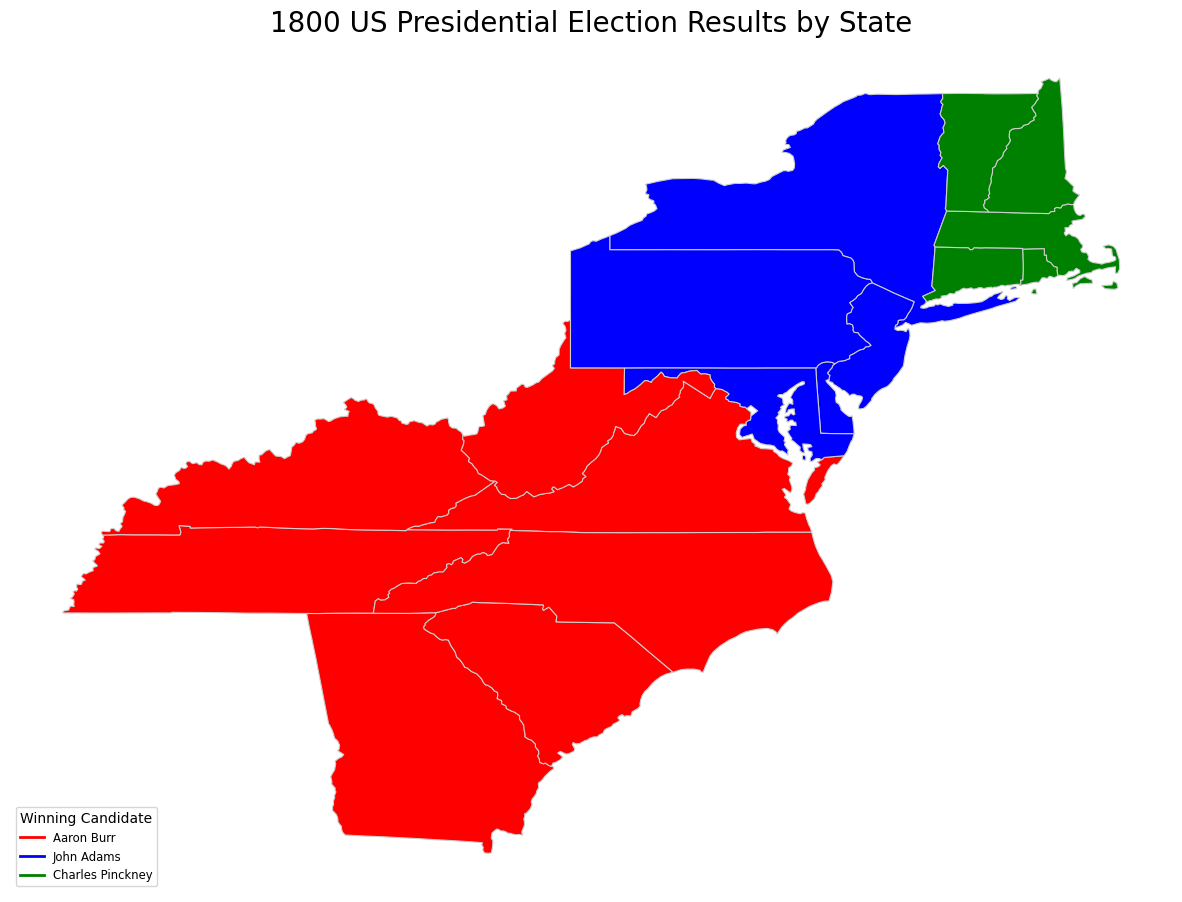

This is the end of the game.


In [ ]:
Scene1()

In [ ]:
import geopandas as gpd
bb = gpd.read_file("./cb_2020_us_state_20m.shp")
bb.head(5)

In [ ]:
gpd.__version__